In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv', parse_dates=['Time Occurred'])

In [3]:
df.head(3)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Weapon Description,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location
0,1208575,03/14/2013,03/11/2013,1800,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,626.0,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)"
1,102005556,01/25/2010,01/22/2010,2300,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)"
2,418,03/19/2013,03/18/2013,2030,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,IC,Invest Cont,510.0,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)"


In [4]:
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location '],
      dtype='object')

In [5]:
df.columns = [col.strip() for col in df.columns]
df.columns

Index(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3',
       'Crime Code 4', 'Address', 'Cross Street', 'Location'],
      dtype='object')

In [34]:
df.shape

(1755318, 26)

In [26]:
df['Time Occurred'] = df['Time Occurred'].astype(str)

In [27]:
df['Time Occurred'] = [i[:-2] + ':' + i[-2] for i in df['Time Occurred']]

In [28]:
df['Datetime'] = pd.to_datetime(df['Date Occurred'] + " " + df['Time Occurred'], format = '%m/%d/%Y %H:%M' )

In [29]:
dt = df['Datetime'][0]

In [30]:
df['dom'] = df['Datetime'].apply(lambda x: int(x.day))

In [31]:
df['month'] = df['Datetime'].apply(lambda x: int(x.month))

In [32]:
df['year'] = df['Datetime'].apply(lambda x: int(x.year))

In [64]:
df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,Datetime,dom,month,year
0,1208575,03/14/2013,03/11/2013,18:0,12,77th Street,1241,626,INTIMATE PARTNER - SIMPLE ASSAULT,0416 0446 1243 2000,...,NaN,NaN,NaN,6300 BRYNHURST AV,NaN,"(33.9829, -118.3338)",2013-03-11 18:00:00,11,3,2013
1,102005556,01/25/2010,01/22/2010,23:0,20,Olympic,2071,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,NaN,VAN NESS,15TH,"(34.0454, -118.3157)",2010-01-22 23:00:00,22,1,2010
2,418,03/19/2013,03/18/2013,20:3,18,Southeast,1823,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,NaN,200 E 104TH ST,NaN,"(33.942, -118.2717)",2013-03-18 20:03:00,18,3,2013
3,101822289,11/11/2010,11/10/2010,18:0,18,Southeast,1803,510,VEHICLE - STOLEN,NaN,...,NaN,NaN,NaN,88TH,WALL,"(33.9572, -118.2717)",2010-11-10 18:00:00,10,11,2010
4,42104479,01/11/2014,01/04/2014,23:0,21,Topanga,2133,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329,...,NaN,NaN,NaN,7200 CIRRUS WY,NaN,"(34.2009, -118.6369)",2014-01-04 23:00:00,4,1,2014


In [60]:
df['Weapon Description'].value_counts(1)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    0.608442
VERBAL THREAT                                     0.083201
UNKNOWN WEAPON/OTHER WEAPON                       0.078826
HAND GUN                                          0.047932
SEMI-AUTOMATIC PISTOL                             0.018923
KNIFE WITH BLADE 6INCHES OR LESS                  0.017914
OTHER KNIFE                                       0.013244
UNKNOWN FIREARM                                   0.011257
VEHICLE                                           0.010238
REVOLVER                                          0.008479
BOTTLE                                            0.007168
BLUNT INSTRUMENT                                  0.006245
STICK                                             0.006226
ROCK/THROWN OBJECT                                0.006220
CLUB/BAT                                          0.006031
FOLDING KNIFE                                     0.005931
KITCHEN KNIFE                                     0.0053

In [62]:
df['Crime Code Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                        160176
BURGLARY FROM VEHICLE                                           135032
VEHICLE - STOLEN                                                134830
BURGLARY                                                        125975
THEFT PLAIN - PETTY ($950 & UNDER)                              124666
THEFT OF IDENTITY                                               109739
INTIMATE PARTNER - SIMPLE ASSAULT                                94907
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114     88442
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                         77903
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                   75268
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                  71954
ROBBERY                                                          70174
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036     61610
CRIMINAL THREATS - NO WEAPON DISPLAYED                           48610
SHOPLI

In [63]:
#df[df['Weapon Description'] == ('HAND GUN' or 'SEMI-AUTOMATIC PISTOL')].head()

In [20]:
# 65% of crimes with hand gun or semi-automatic pistol occur in street/side-walk/parking lot
df[df['Weapon Description'] == ('HAND GUN' or 'SEMI-AUTOMATIC PISTOL')]['Premise Description'].value_counts(1)

STREET                                                    0.395552
SIDEWALK                                                  0.170827
SINGLE FAMILY DWELLING                                    0.084518
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)              0.061097
PARKING LOT                                               0.060631
OTHER BUSINESS                                            0.029223
ALLEY                                                     0.025964
RESTAURANT/FAST FOOD                                      0.015829
DRIVEWAY                                                  0.015543
GAS STATION                                               0.011890
VEHICLE, PASSENGER/TRUCK                                  0.010959
PARK/PLAYGROUND                                           0.010887
YARD (RESIDENTIAL/BUSINESS)                               0.010744
MINI-MART                                                 0.006983
LIQUOR STORE                                              0.00

Populating the interactive namespace from numpy and matplotlib


//anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figure']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


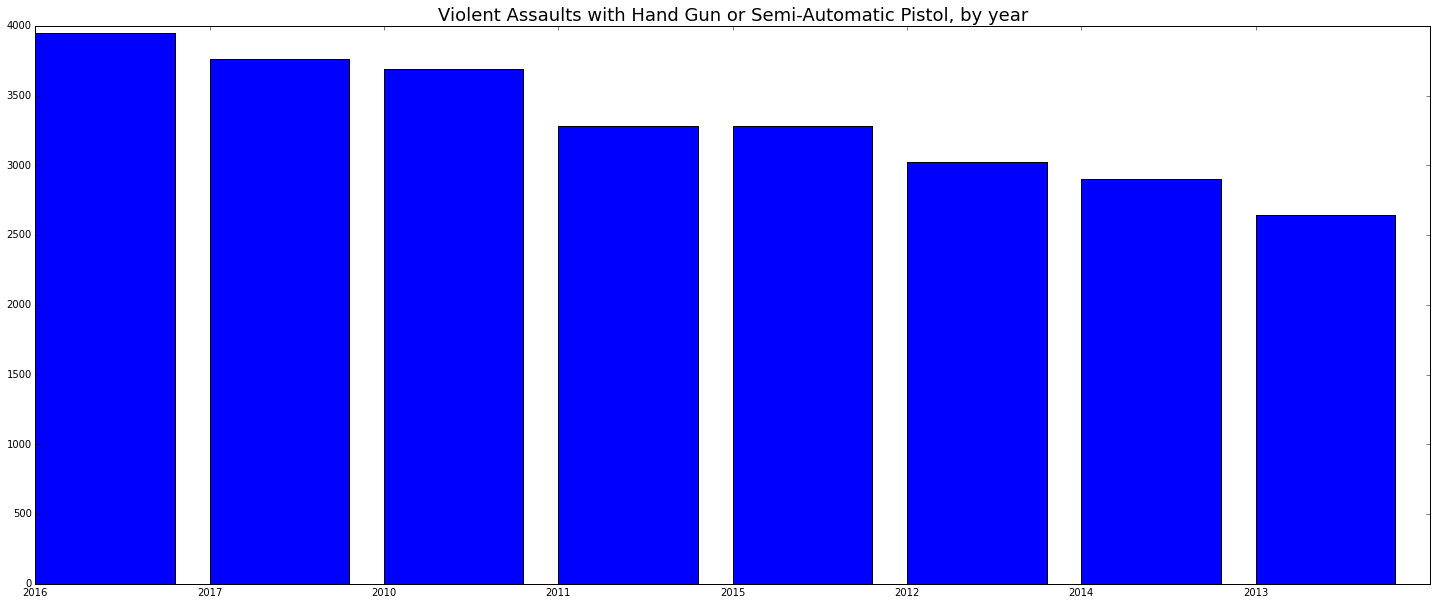

In [53]:
import matplotlib.pyplot as plt
#%matplotlib inline
%pylab inline

mask_assaults = df['Weapon Description'] == ('HAND GUN' or 'SEMI-AUTOMATIC PISTOL')
mask_year = df['year'] <= 2017

n_street_assaults = df[mask_assaults & mask_year]['year'].value_counts()

figure = figsize(25,10)
bar(range(n_street_assaults.shape[0]),n_street_assaults)
xticks(range(n_street_assaults.shape[0]), n_street_assaults.index)
xlabel
title('Violent Assaults with Hand Gun or Semi-Automatic Pistol, by year', size = 18);

In [76]:
# When?

mask_assaults = df['Weapon Description'] == ('HAND GUN' or 'SEMI-AUTOMATIC PISTOL')
mask_year_2017 = df['year'] == 2017

n_street_assaults_2017 = df[mask_assaults & mask_year_2017]['year'].value_counts(1)

import seaborn as sns

m = df.groupby(['weekday occurred','hour occurred']).apply(count_rows).unstack()
figure(figsize=(12,6))
sns.heatmap(m, cmap='Blues_r', linewidth=0.5);

BATTERY - SIMPLE ASSAULT                                        7947
BURGLARY FROM VEHICLE                                           7489
VEHICLE - STOLEN                                                7266
BURGLARY                                                        5866
THEFT PLAIN - PETTY ($950 & UNDER)                              5672
INTIMATE PARTNER - SIMPLE ASSAULT                               4988
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114    4690
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)                 4399
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                  4118
ROBBERY                                                         3687
THEFT OF IDENTITY                                               3664
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                        3529
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036    2583
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                        2445
CRIMINAL THREATS - NO WEAPON DISPL

In [ ]:
#Where?

In [59]:
#Victims?

mask_assaults = df['Weapon Description'] == ('HAND GUN' or 'SEMI-AUTOMATIC PISTOL')
mask_year_2017 = df['year'] == 2017

n_street_assaults_2017 = df[mask_assaults & mask_year_2017]['year'].value_counts(1)

# 'Victim Age', 'Victim Sex',
#        'Victim Descent'

import seaborn as sns
    
sns.boxplot(x='Victim Age', y='Crime Code', data=n_street_assaults_2017)

ValueError: Could not interpret input 'Victim Age'

In [ ]:
#Attackers?
